## 仕入商品分析Ⅺ

- DataNature用として作成したデータをもとにグラフ化する

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install japanize-matplotlib
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=2fe8890c678d031d79a108c543ba2f09aada1199f6644672684e1a7c489ef51d
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Purchased_products/csv/仕入商品分析Ⅲ.csv', encoding='cp932')

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

#### データ抽出

In [ ]:
df_graph = df

In [ ]:
print(df['大分類'].unique())
print(df['小分類'].unique())

In [ ]:
# 対象月を指定
df_graph = df_graph[(df_graph['対象月'] >= 202006) & (df_graph['対象月'] <= 202112)]

In [ ]:
# title 指定
total_title = "仕入商品粗利情報（全体）"

In [ ]:
# group1化
df_graph = df_graph.groupby('対象月').sum()

#### グラフ化

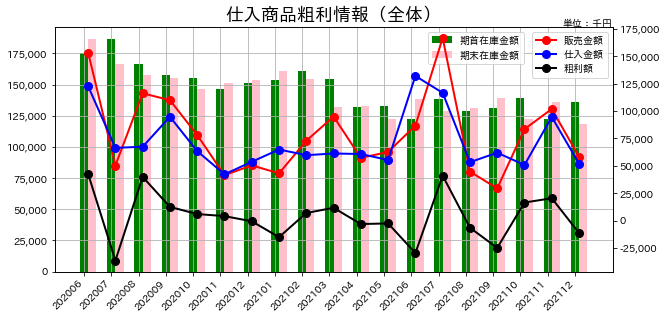

In [ ]:
left = np.arange(0, df_graph.shape[0])

height = df_graph['期首在庫金額']/1000
height1 = df_graph['期末在庫金額']/1000
y1 = df_graph['販売金額']/1000
y2 = df_graph['仕入金額']/1000
y3 = df_graph['原価']/1000
y4 = df_graph['粗利額']/1000
labels = df_graph.index
width = 0.3

fig = plt.figure(figsize=(10, 5))
#第一軸(ax1)と第二軸(ax2)を作って関連付ける
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

#第一軸を折れ線グラフ、第二軸を棒グラフに
ax1.bar(left - width / 2, height, color='g', label='期首在庫金額', tick_label=labels, width=width)
ax1.bar(left + width / 2, height1, color='pink', label='期末在庫金額', width=width)

ax2.plot(left, y1, linewidth=2, color="red", linestyle="solid", marker="o", markersize=8, label='販売金額')
ax2.plot(left, y2, linewidth=2, color="blue", linestyle="solid", marker="o", markersize=8, label='仕入金額')
# ax2.plot(left, y3, linewidth=2, color="blue", linestyle="solid", marker="o", markersize=8, label='原価')
ax2.plot(left, y4, linewidth=2, color="black", linestyle="solid", marker="o", markersize=8, label='粗利額')

plt.title(total_title, fontsize=18)
fig.text(0.9, 0.9, '単位：千円', ha='right', va='top')

ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# plt.savefig('test.png')

# ax1.legend()
ax1.legend(bbox_to_anchor=(0.85, 1))
# ax2.legend()
ax2.legend(loc='best')
ax1.grid()
ax1.set_xticklabels(labels)
fig.autofmt_xdate(rotation=45)
plt.show()